# 🇧🇷 Análise dos Indicadores de Segurança Pública nos Estados Brasileiros (2015-2016)

---

### 📚 Fonte dos Dados

**Ministério da Justiça e Segurança Pública (DNSP)**
[Indicadores de Segurança Pública (2015-2016)](https://www.gov.br/mj/pt-br/assuntos/sua-seguranca/seguranca-publica/estatistica/download/dnsp-base-de-dados/indicadoressegurancapublicauf_-1.xlsx/view?utm_source=chatgpt.com)

- Configuração e importe dos pacotes python

In [112]:
import warnings
# Define que todas as ocorrências de avisos (warnings) devem ser ignoradas
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Remove o limite de linhas para que todas sejam exibidas
pd.set_option('display.max_rows', None)

# Remove o limite de colunas para que todas sejam exibidas
pd.set_option('display.max_columns', None)

# Se você quiser garantir que o texto não seja truncado:
pd.set_option('display.max_colwidth', None)

- Carregando os dados

In [113]:

# Configurando o caminho
FILE = '.\..\data\indicadoressegurancapublicauf_.xlsx'

df = pd.read_excel(FILE, sheet_name = 'Vítimas')

- Estrutura do dataset

In [114]:
display(df.head())
display(df.tail())
display(df.dtypes)
display(df.columns)
display(df.isnull().sum())

,UF,Tipo Crime,Ano,Mês,Sexo da Vítima,Vítimas
0,Acre,Homicídio doloso,2016,janeiro,Feminino,0
1,Acre,Homicídio doloso,2016,janeiro,Masculino,18
2,Acre,Homicídio doloso,2016,janeiro,Sexo NI,0
3,Acre,Homicídio doloso,2016,fevereiro,Feminino,4
4,Acre,Homicídio doloso,2016,fevereiro,Masculino,14


,UF,Tipo Crime,Ano,Mês,Sexo da Vítima,Vítimas
4631,Tocantins,Roubo seguido de morte (latrocínio),2015,junho,Masculino,1
4632,Tocantins,Roubo seguido de morte (latrocínio),2015,julho,Masculino,1
4633,Tocantins,Roubo seguido de morte (latrocínio),2015,agosto,Masculino,1
4634,Tocantins,Roubo seguido de morte (latrocínio),2015,outubro,Masculino,2
4635,Tocantins,Roubo seguido de morte (latrocínio),2015,dezembro,Masculino,2


UF                object
Tipo Crime        object
Ano                int64
Mês               object
Sexo da Vítima    object
Vítimas            int64
dtype: object

Index(['UF', 'Tipo Crime', 'Ano', 'Mês', 'Sexo da Vítima', 'Vítimas'], dtype='object')

UF                0
Tipo Crime        0
Ano               0
Mês               0
Sexo da Vítima    0
Vítimas           0
dtype: int64

> Análisando os homicidios 

In [115]:
homicide = df[df['Tipo Crime'] == 'Homicídio doloso']

- Total de homicidios por mês

Mês
dezembro     9458
janeiro      9000
outubro      8822
novembro     8726
março        8621
abril        8268
fevereiro    8171
agosto       8111
maio         8003
setembro     7941
julho        7500
junho        7145
Name: Vítimas, dtype: int64

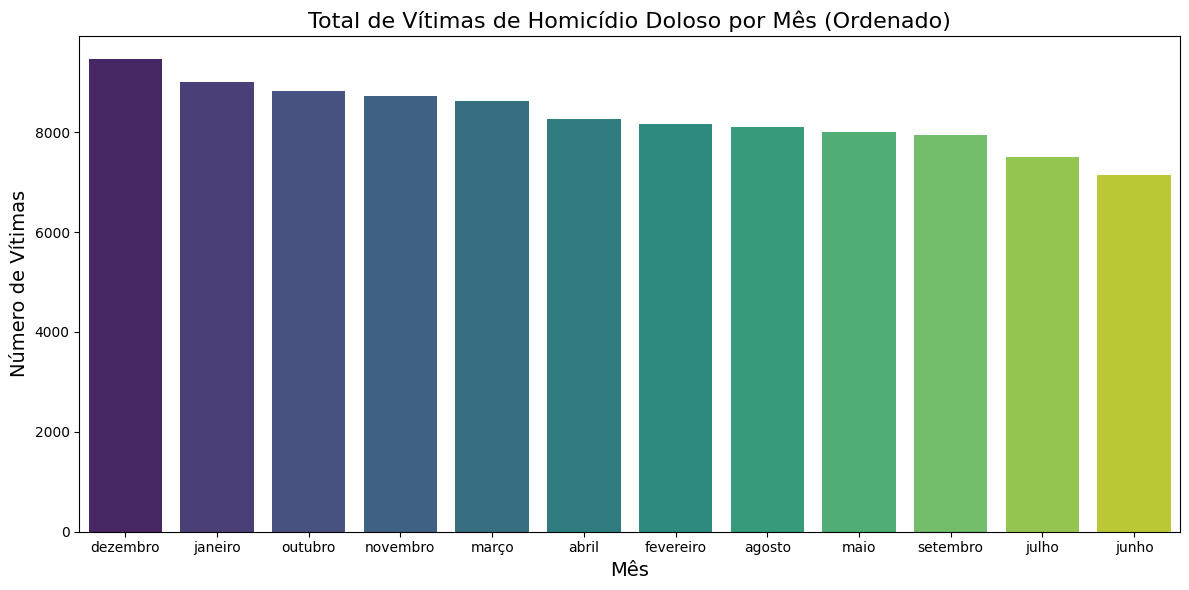

In [116]:

homicide_month = homicide.groupby('Mês')['Vítimas'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6)) # Define o tamanho da figura

sns.barplot(
    x=homicide_month.index,
    y=homicide_month.values,
    palette='viridis' # Adiciona uma paleta de cores
)

plt.title('Total de Vítimas de Homicídio Doloso por Mês (Ordenado)', fontsize=16)
plt.xlabel('Mês', fontsize=14)
plt.ylabel('Número de Vítimas', fontsize=14)


plt.tight_layout()

plt.savefig('./../fig/homicidios_por_mes_.png')
display(homicide_month)

- Homicidios por estado da união

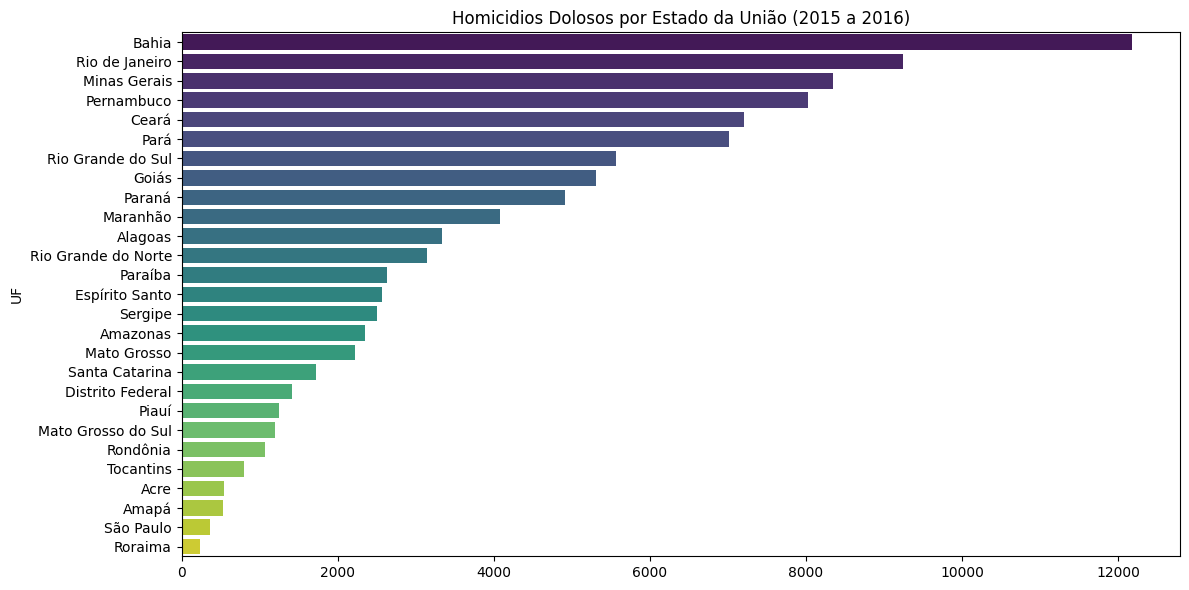

In [117]:
homicide_state = homicide.groupby('UF')['Vítimas'].sum().sort_values(ascending = False)

plt.figure(figsize=(12, 6)) # Define o tamanho da figura

sns.barplot(
    y=homicide_state.index,
    x=homicide_state.values,
    palette='viridis',
    orient = 'h'
)

plt.title('Homicidios Dolosos por Estado da União (2015 a 2016)')

plt.tight_layout()

plt.savefig('./../fig/homicidio_uf.png', dpi=300)

- Gênero das vítimas de homicidio

In [118]:
homicide_gender = homicide.groupby('Sexo da Vítima')['Vítimas'].sum()
display(homicide_gender)

Sexo da Vítima
Feminino      7064
Masculino    86107
Sexo NI       6595
Name: Vítimas, dtype: int64

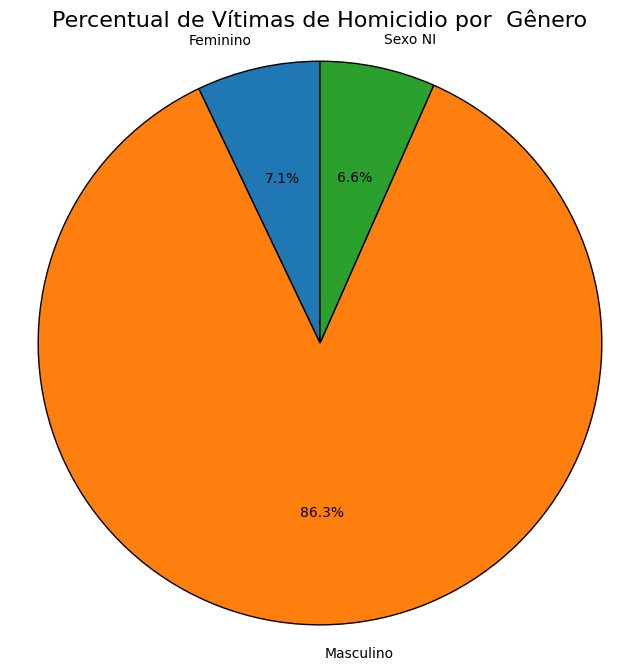

In [119]:
pct_homicide_gender = homicide.groupby('Sexo da Vítima')['Vítimas'].sum() / homicide['Vítimas'].sum() * 100

plt.figure(figsize=(8, 8)) # Define o tamanho da figura (8x8 polegadas)

plt.pie(
    pct_homicide_gender,                             # Dados (os valores percentuais)
    labels=pct_homicide_gender.index,                # Rótulos das fatias (os nomes dos Sexos/Gêneros)
    autopct='%1.1f%%',                      # Formato do percentual nas fatias (1 casa decimal + símbolo %)
    startangle=90,                          # Começa o primeiro segmento no topo (90 graus)
    wedgeprops={'edgecolor': 'black'}       # Adiciona uma borda preta para melhor separação
)

plt.title('Percentual de Vítimas de Homicidio por  Gênero', fontsize=16)

plt.axis('equal') 

plt.savefig('./../fig/pct_homicidio_genero.png', dpi=300)
plt.show()

- Homicidio do grupo feminino por estado da união

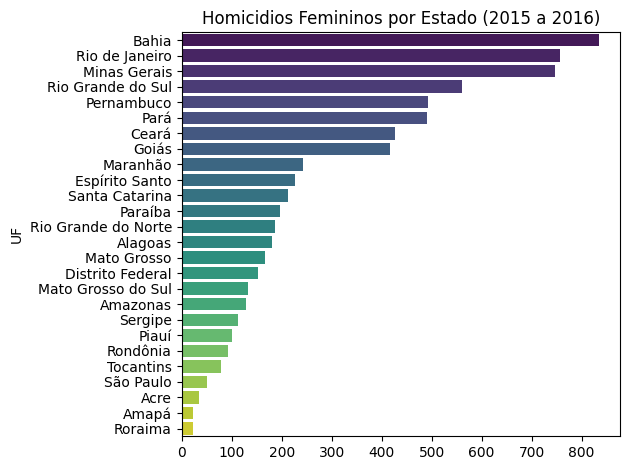

In [120]:
homicide_fem = homicide[homicide['Sexo da Vítima'] == 'Feminino'].groupby('UF')['Vítimas'].sum().sort_values(ascending = False)

sns.barplot(
    y=homicide_fem.index,
    x=homicide_fem.values,
    palette='viridis',
    orient = 'h'
)

plt.title('Homicidios Femininos por Estado (2015 a 2016)')

plt.tight_layout()

plt.savefig('./../fig/homicidio_uf_feminino.png', dpi=300)

- Vítimas por sexo

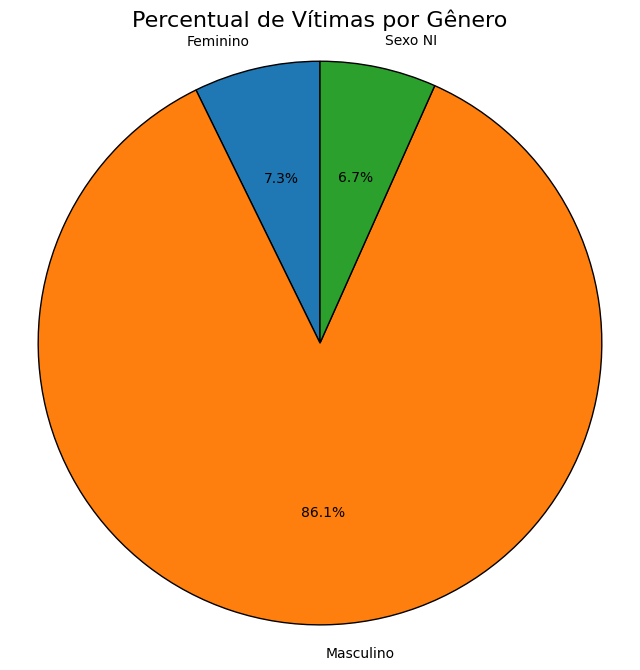

In [121]:

pct_gender = df.groupby('Sexo da Vítima')['Vítimas'].sum() / df['Vítimas'].sum() * 100

plt.figure(figsize=(8, 8)) # Define o tamanho da figura (8x8 polegadas)

plt.pie(
    pct_gender,                             # Dados (os valores percentuais)
    labels=pct_gender.index,                # Rótulos das fatias (os nomes dos Sexos/Gêneros)
    autopct='%1.1f%%',                      # Formato do percentual nas fatias (1 casa decimal + símbolo %)
    startangle=90,                          # Começa o primeiro segmento no topo (90 graus)
    wedgeprops={'edgecolor': 'black'}       # Adiciona uma borda preta para melhor separação
)

plt.title('Percentual de Vítimas por Gênero', fontsize=16)

plt.axis('equal') 

plt.savefig('./../fig/pct_vitima_genero.png', dpi=300)
plt.show()